Goal: Sample from the posterior distribution (for Thompson sampling).

Step 1: mental model: Prior and data --> Posterior. Posterior is similar to $\hat\theta$ frequentist estimate (e.g., RF, NN, XGBoost).

Step 2: Approximate he sample distribution of $\hat\theta$ through Generalized boostrapping. One option would be to bootstrap the data, and fit multiple models $\hat\theta_1, \hat\theta_2, ...$  But we only need a single sample. This is how we get it a single sample.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

bootstrapping = True

if bootstrapping:
    
    print("Bootstrapping...")
    n_obs = X_train.shape[0]
    sample_weight = np.random.exponential(size=n_obs)
    sample_idx = np.random.choice(np.arange(n_obs), size=n_obs, p = sample_weight / sample_weight.sum())
    X_train = X_train[sample_idx,:]
    y_train = y_train[sample_idx]

    n_replacement = len(sample_idx) - len(set(sample_idx))
    print(f"Unique bootstrapped samples: {len(set(sample_idx))} ({len(set(sample_idx))/len(sample_idx):.1%})")

# Train
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, y_train)
param = {"objective": "reg:squarederror"}
model = xgb.train(param, dtrain, num_boost_round=10)

# Evaluate
from math import sqrt
from sklearn.metrics import mean_squared_error

dtest = xgb.DMatrix(X_test, y_test)
predictions = model.predict(dtest)
print(f"rmse = {sqrt(mean_squared_error(y_test, predictions))}")

Bootstrapping...
Unique bootstrapped samples: 168 (50.8%)
rmse = 61.59164581214758


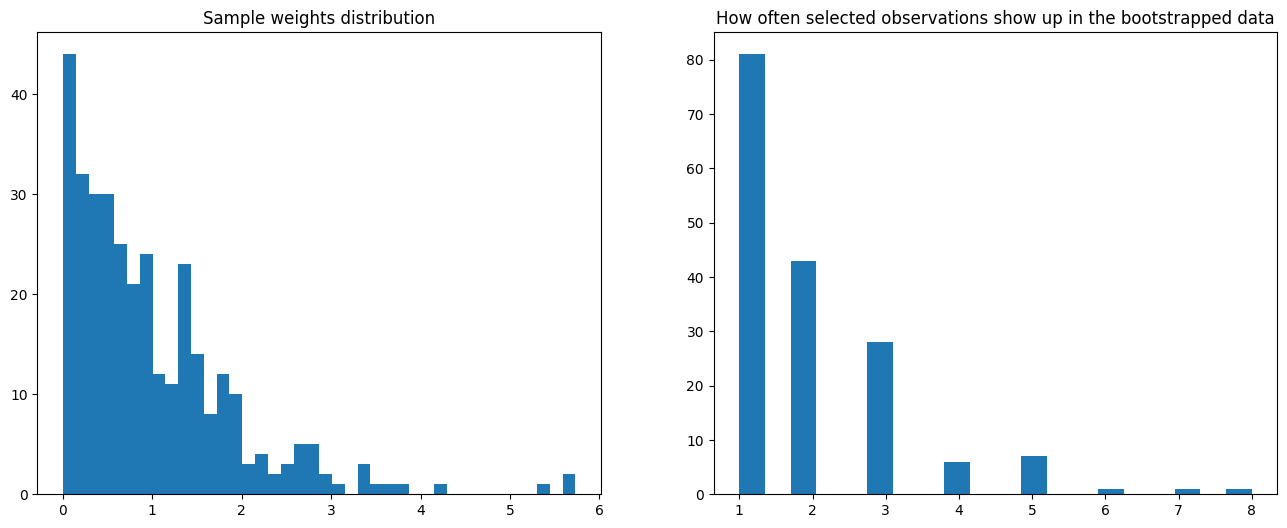

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=2, figsize=(16,6))

ax[0].hist(sample_weight, bins=40)
ax[0].set_title("Sample weights distribution")

from collections import Counter
frequencies = Counter(sample_idx).values()
frequencies = np.array([val for val in frequencies])
ax[1].hist(frequencies, bins=20)
_ = ax[1].set_title("How often selected observations show up in the bootstrapped data")

For the second chart, 80 of the observations show up once, ~40 show up twice, etc...